In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

Import

In [3]:
training_set = pd.read_csv('data/training_set_VU_DM.csv')


Define relevance

In [4]:
training_set['relevance'] = training_set.click_bool + 4*training_set.booking_bool

First look

In [5]:
training_set.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,relevance
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,0


In [6]:
training_set.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,relevance
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02,1.563906e-01
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01,8.307484e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00,5.000000e+00


Correlation

In [7]:
training_corr = training_set.corr()


<AxesSubplot: >

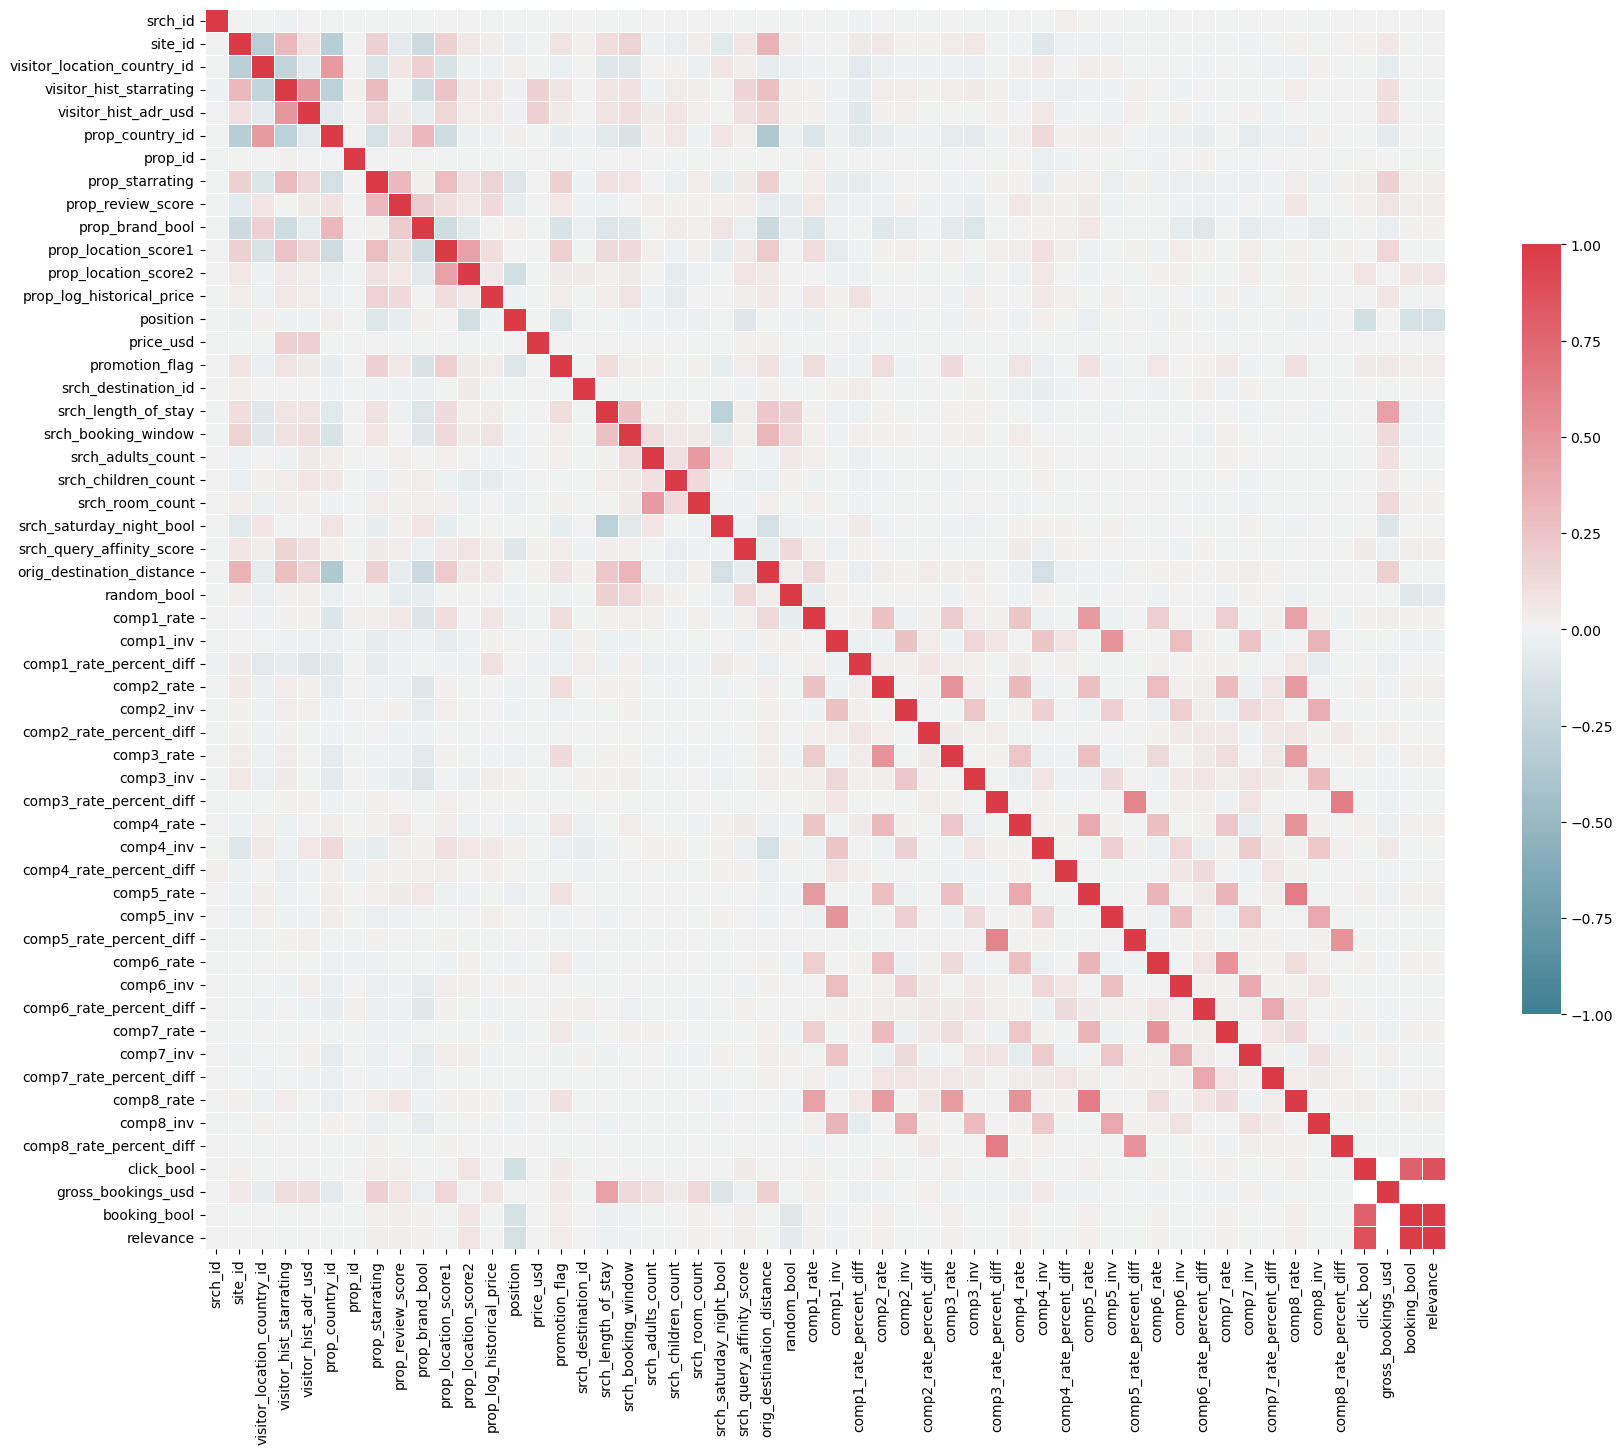

In [8]:
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(training_corr, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Number of unique searches and hotels

In [9]:
n_hotels = len(training_set['prop_id'].unique())
n_searches = len(training_set['srch_id'].unique())

print('Number of hotels: {}'.format(n_hotels))
print('Number of searches: {}'.format(n_searches))

Number of hotels: 129113
Number of searches: 199795


Define relevant query and hotel features

In [10]:
srch_vars = [i for i in training_set.columns if 'srch' in i]
prop_vars = [i for i in training_set.columns if 'prop' in i and i not in ['prop_id', 'prop_country_id']]


Look at how features look per query

In [11]:
training_set.loc[:,srch_vars + prop_vars][training_set.srch_id == 795].head(5)

,srch_id,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price
11035,795,4335,3,22,2,0,1,1,NaN,4,4.0,0,3.50,0.1537,5.08
11036,795,4335,3,22,2,0,1,1,NaN,2,3.5,0,3.00,0.0657,4.62
11037,795,4335,3,22,2,0,1,1,NaN,3,3.5,1,3.22,0.0192,4.74
11038,795,4335,3,22,2,0,1,1,NaN,0,3.5,0,1.61,0.0007,5.28
11039,795,4335,3,22,2,0,1,1,NaN,2,3.0,1,1.10,0.0040,4.61


Aggregate search features per hotel

In [12]:
training_set.groupby('prop_id')[srch_vars].agg(['mean', 'median', 'std'])

srch_id                          srch_destination_id           \
                  mean    median            std                mean   median   
prop_id                                                                        
1        138541.803279  133666.0  104987.791162         7880.000000   6475.0   
2        176617.818182  175476.0   86877.601243         1989.000000   1989.0   
3        163851.670732  170674.0   97832.823948        17559.390244  22730.0   
4        152736.181818  165573.0   95510.248363        13937.090909  12420.0   
5        157679.233333  148775.5   94793.809633        14957.433333  15650.0   
...                ...       ...            ...                 ...      ...   
140817   127633.333333   75953.0  122186.668546        25476.000000  27953.0   
140818   104363.000000  105894.0    7100.392313        12994.000000  12994.0   
140819   150858.000000  150858.0   26482.563169        13247.000000  13247.0   
140820   187979.944444  213862.0  103138.976534        21553.722222  26585.0   
140821   146981.000000  155734.0   91739.334185        12744.571429  13509.0   

                     srch_length_of_stay                  srch_booking_window  \
                 std                mean median       std                mean   
prop_id                                                                         
1        4483.498180            1.475410    1.0  0.923879           15.918033   
2           0.000000            1.636364    1.0  1.206045           22.545455   
3        8770.518582            1.524390    1.0  0.932614           23.695122   
4        4966.429204            5.000000    5.0  2.618615          102.772727   
5        2713.208353            3.366667    3.0  1.828573           50.100000   
...              ...                 ...    ...       ...                 ...   
140817   4290.289850            5.333333    1.0  7.505553          134.333333   
140818      0.000000            6.000000    3.0  7.000000           24.666667   
140819      0.000000            5.000000    5.0  0.000000           46.000000   
140820   8302.888227            4.611111    4.0  2.523743           61.888889   
140821   3675.301795            2.428571    1.0  2.299068           13.142857   

         ... srch_children_count srch_room_count                   \
         ...                 std            mean median       std   
prop_id  ...                                                        
1        ...            0.827466        1.180328    1.0  0.806395   
2        ...            0.603023        1.000000    1.0  0.000000   
3        ...            0.622401        1.073171    1.0  0.262019   
4        ...            0.646335        1.045455    1.0  0.213201   
5        ...            0.964305        1.100000    1.0  0.402578   
...      ...                 ...             ...    ...       ...   
140817   ...            1.732051        1.000000    1.0  0.000000   
140818   ...            0.000000        1.000000    1.0  0.000000   
140819   ...            0.707107        1.000000    1.0  0.000000   
140820   ...            0.235702        1.000000    1.0  0.000000   
140821   ...            0.755929        1.000000    1.0  0.000000   

        srch_saturday_night_bool                  srch_query_affinity_score  \
                            mean median       std                      mean   
prop_id                                                                       
1                       0.606557    1.0  0.492568                -46.171467   
2                       0.636364    1.0  0.504525                -22.589767   
3                       0.658537    1.0  0.477119                -29.565475   
4                       0.090909    0.0  0.294245                       NaN   
5                       0.533333    1.0  0.507416                       NaN   
...                          ...    ...       ...                       ...   
140817                  0.666667    1.0  0.577350                       NaN   
14

Prices per hotel

In [13]:
price_per_prop = training_set.groupby('prop_id')[('price_usd','srch_length_of_stay','srch_room_count','srch_saturday_night_bool')].agg(['mean', 'median', 'std','max', 'min', 'count'])
price_per_prop[('price_usd','mean')][price_per_prop[('price_usd','mean')] == min(price_per_prop[('price_usd','mean')])]
# price_per_prop.head(50)

C:\Users\muraf\AppData\Local\Temp\ipykernel_39928\4151839236.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  price_per_prop = training_set.groupby('prop_id')[('price_usd','srch_length_of_stay','srch_room_count','srch_saturday_night_bool')].agg(['mean', 'median', 'std','max', 'min', 'count'])


prop_id
43364    3.375
Name: (price_usd, mean), dtype: float64

In [14]:
training_set['price_usd'][training_set.prop_id == 43364]

1123644    2.78
4397694    3.97
Name: price_usd, dtype: float64

In [15]:
most_occuring_props = price_per_prop[price_per_prop[('price_usd','count')] > 1000].index.values
most_occuring_props

array([  1230,   1497,   3213,   4503,   4875,   5002,   5322,   7880,
         8864,  13674,  14082,  15390,  15994,  17633,  21018,  23190,
        23212,  23268,  24545,  25159,  26248,  30950,  34151,  35223,
        35264,  35679,  37818,  38419,  40279,  41278,  41400,  41712,
        44923,  46274,  49656,  53494,  57952,  59657,  59781,  60468,
        60846,  61529,  67477,  68420,  69184,  69261,  70177,  74754,
        77089,  77795,  77914,  78500,  79740,  80475,  90730,  90809,
        90845,  94455, 104517, 105408, 114932, 116942, 117294, 122112,
       124342, 125083, 126657, 131892, 134154, 134323, 135499, 137997,
       138600], dtype=int64)

In [16]:
hotel_1230 = training_set[training_set.prop_id == 1230]
hotel_1230[hotel_1230.price_usd > 100000].loc[:,srch_vars]
# plt.scatter(hotel_1230.srch_length_of_stay, hotel_1230.price_usd)
# plt.show()

,srch_id,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score
4819683,323441,4562,3,57,2,0,1,1,-3.3664


In [17]:
srch_323441 = training_set[training_set.srch_id == 323441]
srch_323441.loc[:,'price_usd']

4819683    165347.0
4819684    173397.0
4819685    258529.0
4819686    342404.0
4819687    251910.0
4819688    151511.0
4819689    243236.0
4819690    261767.0
4819691    155838.0
4819692    196005.0
4819693    239862.0
4819694    172850.0
4819695    108365.0
4819696    232724.0
4819697    236211.0
4819698    334705.0
4819699    290974.0
4819700    323102.0
4819701    214255.0
4819702    225205.0
4819703    241121.0
4819704    191844.0
4819705    166604.0
4819706    222449.0
4819707    169748.0
4819708    254373.0
4819709    212590.0
Name: price_usd, dtype: float64

In [18]:
comp_rate_percent_diff = [i for i in training_set.columns if 'comp' in i and 'rate_percent_diff' in i]
comp_rate_percent_diff.append('price_usd')

mean_price_per_srch = training_set.groupby('srch_id')['price_usd'].mean()
mean_price_per_srch[mean_price_per_srch == min(mean_price_per_srch)]
# mean_price_per_srch['mean_comp_rate_percent_diff'] = mean_price_per_srch.iloc[:, :8].mean(axis=1)
# comp_rate_percent_diff.remove('price_usd')
# mean_price_per_srch.drop(comp_rate_percent_diff, axis=1, inplace=True)

# mean_price_per_srch['mean_comp_rate_percent_diff'] = mean_price_per_srch['mean_comp_rate_percent_diff'].clip(upper=mean_price_per_srch['mean_comp_rate_percent_diff'].quantile(0.945), lower=mean_price_per_srch['mean_comp_rate_percent_diff'].quantile(0.00000))
# mean_price_per_srch['price_usd'] = mean_price_per_srch['price_usd'].clip(upper=mean_price_per_srch['price_usd'].quantile(0.945), lower=mean_price_per_srch['price_usd'].quantile(0.0000))

# mean_price_per_srch.describe()


srch_id
239365    0.004667
Name: price_usd, dtype: float64

Some searches have a mean price of around 0 usd??

In [19]:
training_set[training_set.srch_id == 239365][['price_usd', 'prop_id','relevance','promotion_flag']+comp_rate_percent_diff]

,price_usd,prop_id,relevance,promotion_flag,comp1_rate_percent_diff,comp2_rate_percent_diff,comp3_rate_percent_diff,comp4_rate_percent_diff,comp5_rate_percent_diff,comp6_rate_percent_diff,comp7_rate_percent_diff,comp8_rate_percent_diff,price_usd
3564040,0.00,24,0,1,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3564041,0.03,1317,0,0,NaN,NaN,45.0,NaN,NaN,NaN,NaN,NaN,0.03
3564042,0.00,3614,0,1,NaN,5.0,NaN,17.0,17.0,NaN,NaN,NaN,0.00
3564043,0.01,8254,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01
3564044,0.00,10802,0,0,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,0.00
3564045,0.00,16011,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3564046,0.00,21541,0,1,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,0.00
3564047,0.02,21936,0,0,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,0.02
3564048,0.00,25494,0,1,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3564049,0.00,34818,0,0,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,0.00


For example, prop_id = 24. Let's see the prices of the property on other queries.
Seems like the prices are normal for other queries except for srch_id = 3564040

In [21]:
training_set[training_set.prop_id == 24][['price_usd','srch_id','relevance']]

,price_usd,srch_id,relevance
83089,118.47,5565,0
228741,81.32,15341,0
469379,82.00,31447,0
937029,81.35,62558,0
1018210,81.79,67992,0
1090194,81.09,72772,0
1559492,99.30,104656,0
1773142,81.41,119075,0
1936716,78.32,129998,0
2028573,81.16,136141,0


Explore Test Set

In [22]:
test_set = pd.read_csv('data/test_set_VU_DM.csv')

In [23]:
test_set[test_set['srch_id'] == 32773][['price_usd','prop_id']]

,price_usd,prop_id
489415,7719411.0,12550
489416,7043117.0,13915
489417,3276644.0,30935
489418,9661340.0,54959
489419,3076364.0,60064
489420,4279672.0,120583
489421,6753277.0,123399
489422,5016168.0,124420


In [24]:
test_set_per_search = test_set.groupby('srch_id')['price_usd'].mean()
test_set_per_search[test_set_per_search == max(test_set_per_search)]

srch_id
32773    5853249.125
Name: price_usd, dtype: float64

In [25]:
comp_rate_percent_diff = [i for i in test_set.columns if 'comp' in i and 'rate_percent_diff' in i]
comp_rate_percent_diff.append('price_usd')

mean_price_per_srch = test_set.groupby('srch_id')['price_usd'].mean()
mean_price_per_srch[mean_price_per_srch == min(mean_price_per_srch)]
# mean_price_per_srch['mean_comp_rate_percent_diff'] = mean_price_per_srch.iloc[:, :8].mean(axis=1)
# comp_rate_percent_diff.remove('price_usd')
# mean_price_per_srch.drop(comp_rate_percent_diff, axis=1, inplace=True)

# mean_price_per_srch['mean_comp_rate_percent_diff'] = mean_price_per_srch['mean_comp_rate_percent_diff'].clip(upper=mean_price_per_srch['mean_comp_rate_percent_diff'].quantile(1), lower=mean_price_per_srch['mean_comp_rate_percent_diff'].quantile(0.00000))
# mean_price_per_srch['price_usd'] = mean_price_per_srch['price_usd'].clip(upper=mean_price_per_srch['price_usd'].quantile(1), lower=mean_price_per_srch['price_usd'].quantile(0.0000))

# mean_price_per_srch.boxplot()

srch_id
188112    0.002581
Name: price_usd, dtype: float64

In [26]:
training_set[training_set.random_bool == 0].groupby(['srch_destination_id','prop_id']).agg({'position':'mean'}).head(50)

position
srch_destination_id prop_id          
2                   1974         13.0
                    3003          3.0
                    10729         1.0
                    23255        20.0
                    27919        21.0
                    37227        22.0
                    41271         6.0
                    46252         4.0
                    58198        18.0
                    58920        19.0
                    59694        16.0
                    71348        10.0
                    76911         9.0
                    87193        12.0
                    90304         8.0
                    96334        15.0
                    112491        2.0
                    128440       14.0
                    138080        7.0
7                   551           9.0
                    6970         14.0
                    37008        15.0
                    41658        13.0
                    44652         4.0
                    58160        10.0
                    59349         2.0
                    63272         3.0
                    72655         7.0
                    81565        12.0
                    86534         6.0
                    127374        8.0
                    138390        1.0
8                   1745          3.0
                    8186         10.0
                    15098        15.0
                    23972        14.0
                    44927        19.0
                    59456         7.0
                    59625        16.0
                    65898        12.0
                    77082        20.0
                    88350         6.0
                    88681         9.0
                    91304        13.0
                    94835         2.0
                    104973       18.0
                    112675        1.0
                    125825        8.0
                    131216        4.0
9                   3422         25.0

Group by srch_id

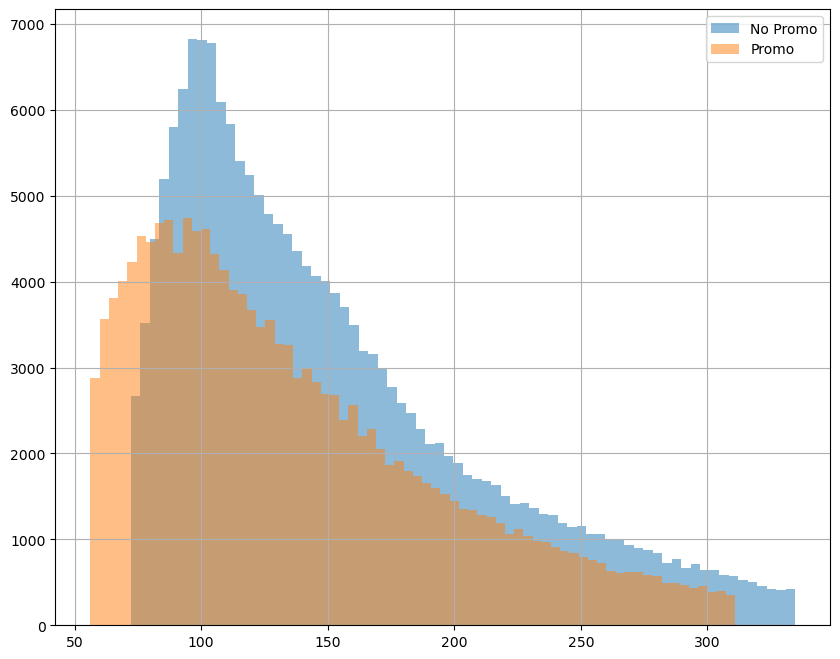

In [56]:
f, ax = plt.subplots(figsize=(10, 8))

price_per_srch_id_no_promo = training_set[training_set.promotion_flag == 0].groupby('srch_id')['price_usd'].mean()
price_per_srch_id_promo = training_set[training_set.promotion_flag == 1].groupby('srch_id')['price_usd'].mean()


price_per_srch_id_no_promo[(price_per_srch_id_no_promo < price_per_srch_id_no_promo.quantile(0.95)) & 
                  (price_per_srch_id_no_promo > price_per_srch_id_no_promo.quantile(0.05))]\
                      .hist(ax = ax,bins=70, alpha = 0.5, label = 'No Promo')
price_per_srch_id_promo[(price_per_srch_id_promo < price_per_srch_id_promo.quantile(0.95)) & 
                  (price_per_srch_id_promo > price_per_srch_id_promo.quantile(0.05))]\
                      .hist(ax = ax,bins=70, alpha = 0.5, label = 'Promo')
ax.legend()

Group by prop_id

array([[<AxesSubplot: title={'center': 'price_usd'}>,
        <AxesSubplot: title={'center': 'mean_comp_diff'}>]], dtype=object)

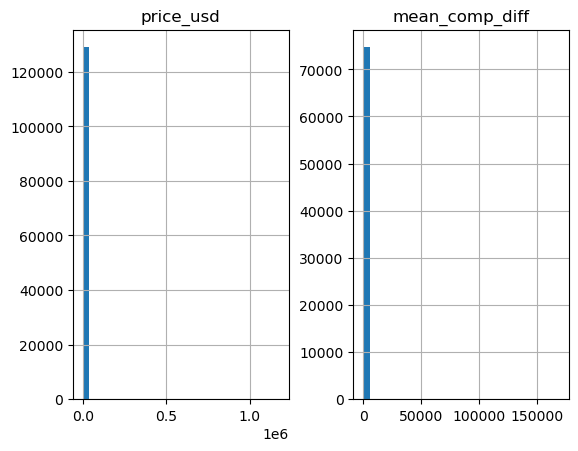

In [69]:
comp_diff_vars = [i for i in training_set.columns if 'comp' in i and 'diff' in i]
training_set['mean_comp_diff'] = training_set.loc[:, comp_diff_vars].mean(axis=1)

price_per_prop = training_set.groupby('prop_id')[['price_usd','mean_comp_diff']].agg({'price_usd':'mean','mean_comp_diff':'mean'})
price_per_prop[price_per_prop < price_per_prop.quantile(0.95)].hist(bins=30)

In [63]:
[comp_diff for comp_diff in training_set.columns if 'comp' in comp_diff and 'rate_percent_diff' in comp_diff]

['comp1_rate_percent_diff',
 'comp2_rate_percent_diff',
 'comp3_rate_percent_diff',
 'comp4_rate_percent_diff',
 'comp5_rate_percent_diff',
 'comp6_rate_percent_diff',
 'comp7_rate_percent_diff',
 'comp8_rate_percent_diff']

In [73]:
training_set.isna().mean()

srch_id                        0.000000
date_time                      0.000000
site_id                        0.000000
visitor_location_country_id    0.000000
visitor_hist_starrating        0.949204
visitor_hist_adr_usd           0.948977
prop_country_id                0.000000
prop_id                        0.000000
prop_starrating                0.000000
prop_review_score              0.001485
prop_brand_bool                0.000000
prop_location_score1           0.000000
prop_location_score2           0.219902
prop_log_historical_price      0.000000
position                       0.000000
price_usd                      0.000000
promotion_flag                 0.000000
srch_destination_id            0.000000
srch_length_of_stay            0.000000
srch_booking_window            0.000000
srch_adults_count              0.000000
srch_children_count            0.000000
srch_room_count                0.000000
srch_saturday_night_bool       0.000000
srch_query_affinity_score      0.935986


In [77]:
comp_vars = [i for i in training_set.columns if 'comp' in i]

In [78]:
training_set.loc[training_set.prop_id == 424, comp_vars]

,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,...,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,mean_comp_diff
81716,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,7.0,7.000000
87217,NaN,NaN,NaN,1.0,0.0,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,19.0,14.666667
152618,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,6.0,6.000000
159139,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,13.0,13.000000
266343,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4586058,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,13.0,13.000000
4595283,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
4806567,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,8.000000
4822043,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,4.0,4.000000
